In [1]:
import numpy as np # Math Functions
import pandas as pd #Data managment and processing 
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization 
import plotly.express as px # Advanced Data visualization 
import warnings # Avoid warings that might arrise from data visualization
warnings.filterwarnings('ignore')
import datetime # For time line analisys
import random

In [2]:
Bk_df= pd.read_csv("Data\day.csv" ,index_col=False,dtype="unicode")
Bk_df.head() # View Data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600


In [3]:
# First lets find the total no. of rows
Bk_df.shape

(730, 16)

In [4]:
# lets find all the columns with null values
Bk_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     730 non-null    object
 1   dteday      730 non-null    object
 2   season      730 non-null    object
 3   yr          730 non-null    object
 4   mnth        730 non-null    object
 5   holiday     730 non-null    object
 6   weekday     730 non-null    object
 7   workingday  730 non-null    object
 8   weathersit  730 non-null    object
 9   temp        730 non-null    object
 10  atemp       730 non-null    object
 11  hum         730 non-null    object
 12  windspeed   730 non-null    object
 13  casual      730 non-null    object
 14  registered  730 non-null    object
 15  cnt         730 non-null    object
dtypes: object(16)
memory usage: 91.4+ KB


In [5]:
# No Null Values found in the Data 
# Lets first drop the column that have no Data
Bk_df=Bk_df.drop('instant',axis=1)# Since we dont need the index number
# Dropping casual and registered as we need to work on the total and not subsets
Bk_df=Bk_df.drop(['casual','registered'],axis=1)
# We can drop the holday column as that data is already persent in the working days column
Bk_df=Bk_df.drop('holiday',axis=1)


In [6]:
# Fixing Data types
Bk_df.dteday=pd.to_datetime(Bk_df.dteday,dayfirst=True)

In [7]:
int_cols=['season','yr','mnth','weekday','workingday','weathersit','cnt']
Bk_df[int_cols]=Bk_df[int_cols].astype(int)
float_cols=['temp','atemp','hum','windspeed']
Bk_df[float_cols]=Bk_df[float_cols].astype(float)
Bk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int32         
 2   yr          730 non-null    int32         
 3   mnth        730 non-null    int32         
 4   weekday     730 non-null    int32         
 5   workingday  730 non-null    int32         
 6   weathersit  730 non-null    int32         
 7   temp        730 non-null    float64       
 8   atemp       730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  cnt         730 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(7)
memory usage: 48.6 KB


#### De-Code the data for EDA

In [8]:
# De-code yr column
Bk_df.yr=[2018 if x==0 else 2019 for x in Bk_df.yr]

In [9]:
#De-Code season column
Bk_df.season=['Spring' if x==1 else 'Summer' if x==2 else 'Fall' if x==3 else 'Winter' for x in Bk_df.season]

In [10]:
#De-code weather
Bk_df.weathersit=['Clear' if x==1 else 'Mist' if x==2 else 'Light_snow_rain' if x==3 else 'Heavy_snow_rain' for x in Bk_df.weathersit]

#### Simplify data

In [11]:
# since we dont need such high accuracy in the temprature and humidity lets simplify it 
def sim(col):
    out=Bk_df[col].apply(lambda x: round(x,1))
    return out
for r in ['temp','atemp','hum','windspeed']:
    Bk_df[r]=sim(r)

#### Now that the data is clean and ready to use lets explore it 

##### Univariate analysis

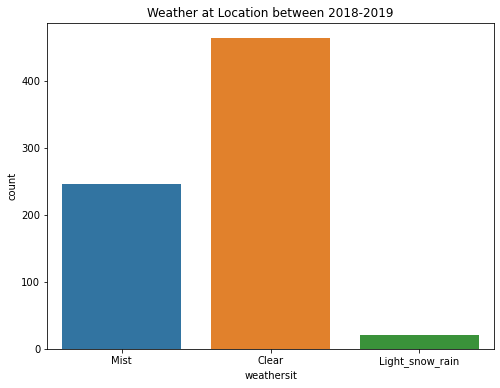

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='weathersit',data=Bk_df)
plt.title("Weather at Location between 2018-2019")
plt.show()
# We see that the location has had mostly good weather and very little snow/rain

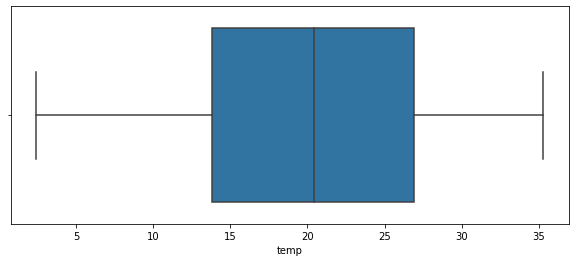

In [13]:
#lets see the temprature ranges of the location
plt.figure(figsize=(10,4))
sns.boxplot(x='temp',data=Bk_df)
plt.show()

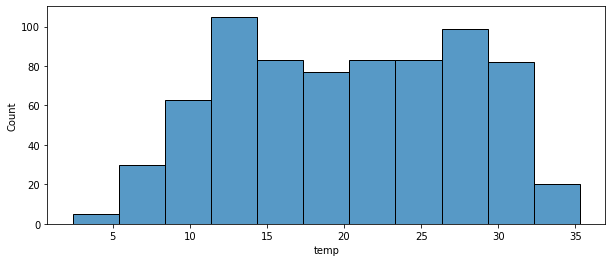

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(x='temp',data=Bk_df,bins=11)
plt.show()

In [15]:
Bk_df.temp.describe()
# We see that the weather has no Outliers and has a consistant pattern with very few days in the temperature extremes

count    730.000000
mean      20.319315
std        7.506701
min        2.400000
25%       13.800000
50%       20.450000
75%       26.900000
max       35.300000
Name: temp, dtype: float64

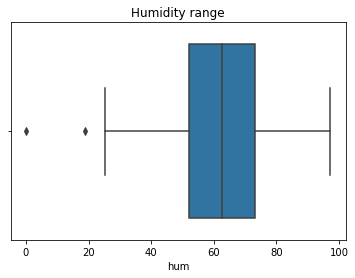

In [16]:
sns.boxplot(x='hum',data=Bk_df)
plt.title("Humidity range")
plt.show()
# We see that there are outliers and humidity has extremely low values .. lets have a closer look 

In [17]:
Bk_df[Bk_df.hum<=20]
# we have reported light rain/snow on 10th march but a hum=0.0 this could be a data error lets look deeper

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,2018-02-19,Spring,2018,2,6,0,Clear,16.4,19.6,18.8,34.0,1635
68,2018-03-10,Spring,2018,3,4,1,Light_snow_rain,16.0,19.3,0.0,17.5,623


In [18]:
Bk_df[60:75]
# as we can see there is some major diffrence and the data for that day is wrong as we can logicaly fill that with an avg of the day before and after


,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
60,2018-03-02,Spring,2018,3,3,1,Clear,13.7,16.0,45.0,20.6,2134
61,2018-03-03,Spring,2018,3,4,1,Clear,8.1,10.0,31.8,15.1,1685
62,2018-03-04,Spring,2018,3,5,1,Mist,10.7,12.8,61.0,13.6,1944
63,2018-03-05,Spring,2018,3,6,0,Mist,15.8,18.9,78.9,16.9,2077
64,2018-03-06,Spring,2018,3,0,0,Mist,15.4,18.3,94.8,23.0,605
65,2018-03-07,Spring,2018,3,1,1,Clear,10.7,11.9,55.1,22.9,1872
66,2018-03-08,Spring,2018,3,2,1,Clear,12.0,15.1,42.1,8.1,2133
67,2018-03-09,Spring,2018,3,3,1,Mist,12.1,14.3,77.5,14.8,1891
68,2018-03-10,Spring,2018,3,4,1,Light_snow_rain,16.0,19.3,0.0,17.5,623
69,2018-03-11,Spring,2018,3,5,1,Mist,13.0,15.2,65.0,15.6,1977


In [19]:
Bk_df.hum[Bk_df.hum==0]=(77.5+65)/2
Bk_df[65:70]

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
65,2018-03-07,Spring,2018,3,1,1,Clear,10.7,11.9,55.10,22.9,1872
66,2018-03-08,Spring,2018,3,2,1,Clear,12.0,15.1,42.10,8.1,2133
67,2018-03-09,Spring,2018,3,3,1,Mist,12.1,14.3,77.50,14.8,1891
68,2018-03-10,Spring,2018,3,4,1,Light_snow_rain,16.0,19.3,71.25,17.5,623
69,2018-03-11,Spring,2018,3,5,1,Mist,13.0,15.2,65.00,15.6,1977


#### Bivariate/ Multi-variate analysis

In [20]:
# Before we start analisys we need to consider a 2 things
# 1. our target column is 'cnt'
# 2. Break down data into numeric and categorical

#Lets do the splitting of cols
cat_cols=['yr','season','mnth','weekday','workingday','weathersit']
num_cols=['dteday','temp','atemp','hum','windspeed']


In [21]:
# function to compare categorical columns 
def cat_plot(col,df=Bk_df,pvt=False,pl=True):
    pal=["hls",'husl','Paired','rocket','mako']
    if (pl==True):
        plt.figure(figsize=(8,6))
        sns.barplot(data=df,x=col,y='cnt',palette=pal[random.randint(0,4)])
        plt.title("Chart showing total rentals split by "+col)
        plt.show()
        plt.figure(figsize=(8,6))
        plt.title("Chart showing total rentals split by "+col+" by year")
        sns.barplot(data=df,x=col,y='cnt',palette=pal[random.randint(0,4)],hue='yr')
        plt.show()
    if (pvt==True):
        pv=df.pivot_table(values='cnt',index=col,aggfunc='sum')
        return pv
   

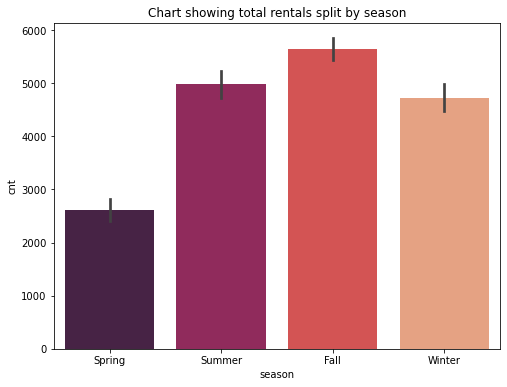

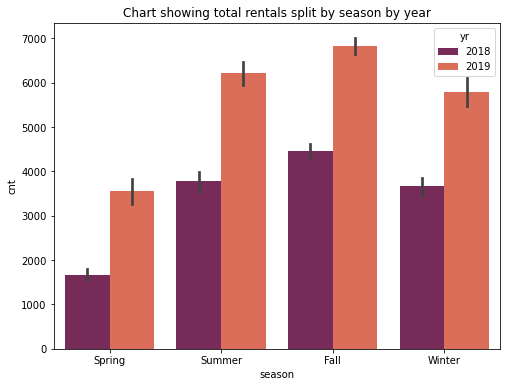

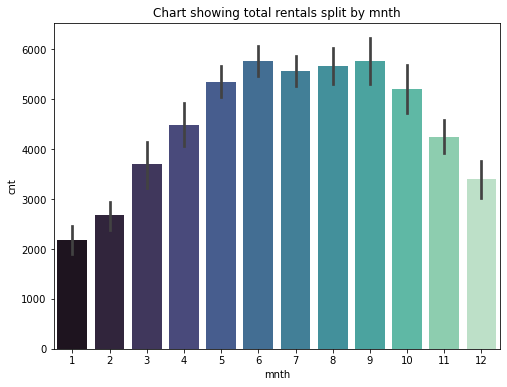

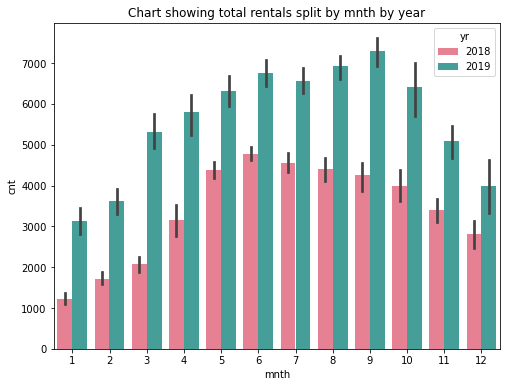

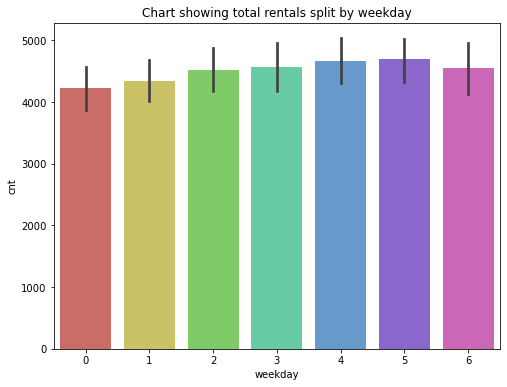

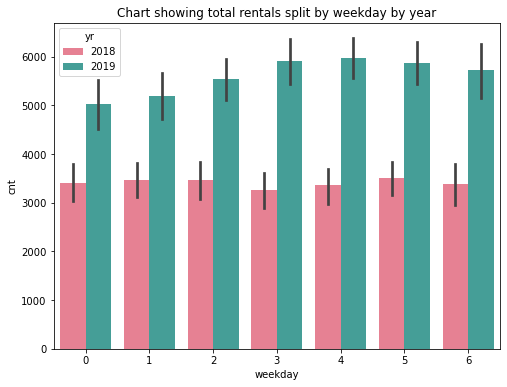

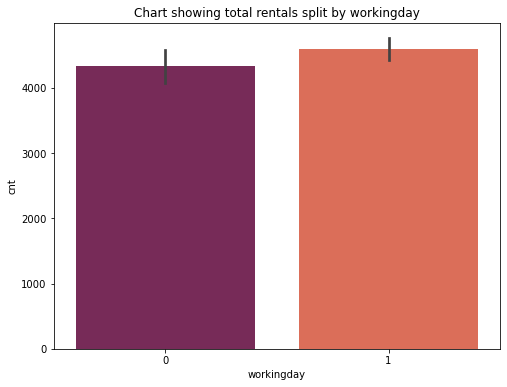

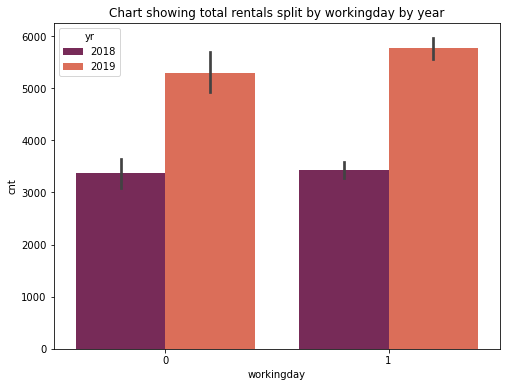

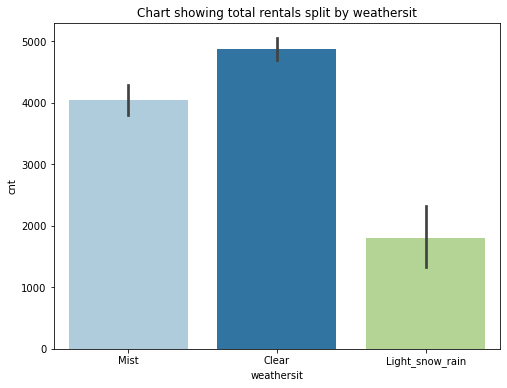

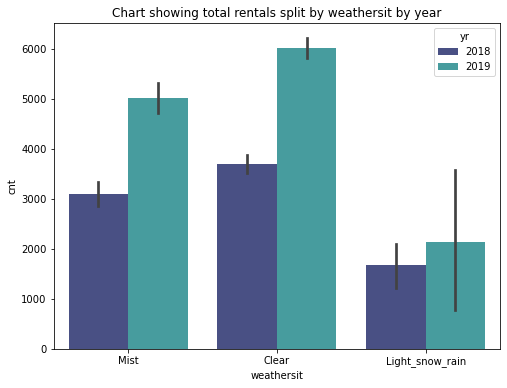

In [22]:
for x in cat_cols[1:]:
    cat_plot(x)


##### Observations
1.	There is an improvement in rentals in every aspect when seen year on year.
2.	The bestselling months are July to September.
3.	Weekends are generally show lower rentals 
4.	As a result working days the rentals are higher
5.	 Even the lightest rain brings down the rentals drastically 
6.	Summer and fall are the best seasons with highest demand .


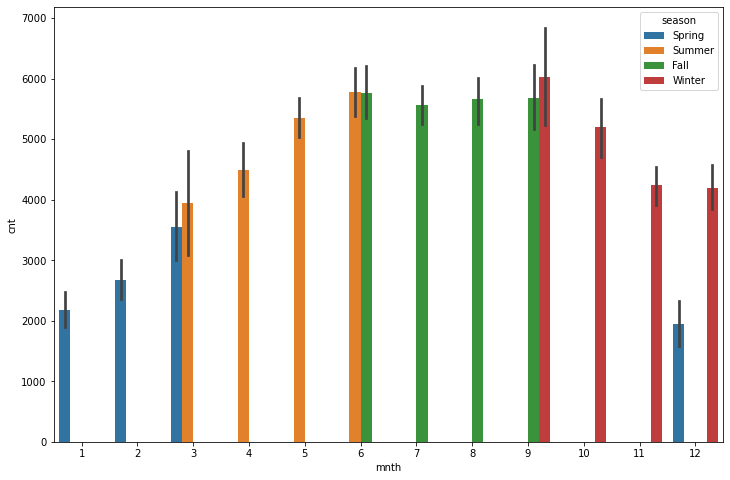

In [23]:
# lets sea if there is a realtion between seasons and months
plt.figure(figsize=(12,8))
sns.barplot(x='mnth',y='cnt',hue="season",data=Bk_df)
plt.show()
#There is a clear distinction and we can see as spring progresses and summer sets in we see an increase in demand that goes down
# as winter sets in with spring being the lowest season.

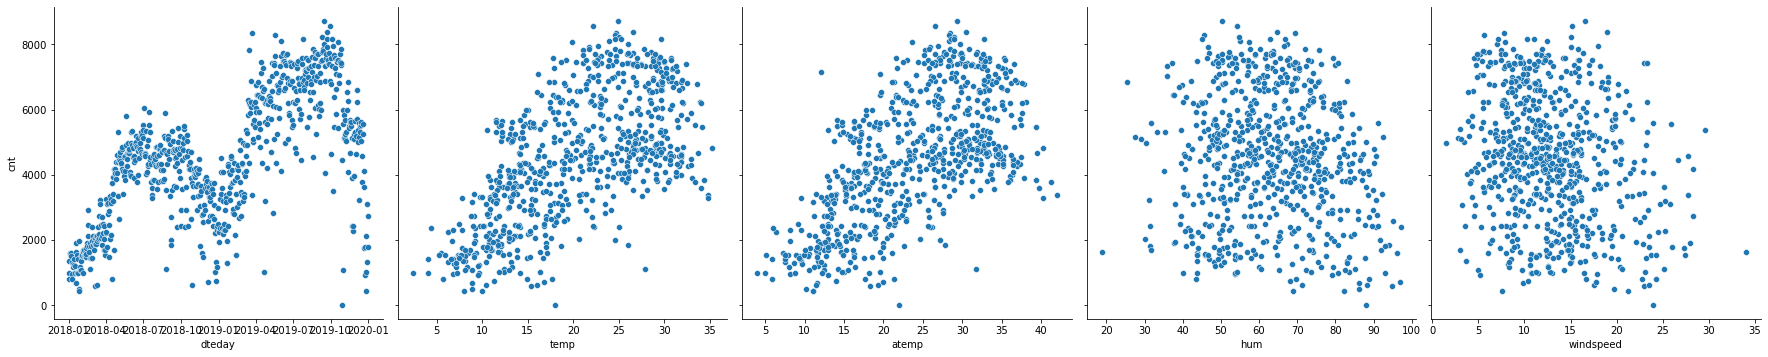

In [24]:
# Lets look at the numeric data 
sns.pairplot(data=Bk_df,x_vars=num_cols,y_vars='cnt',height=5,aspect=1)
plt.show()

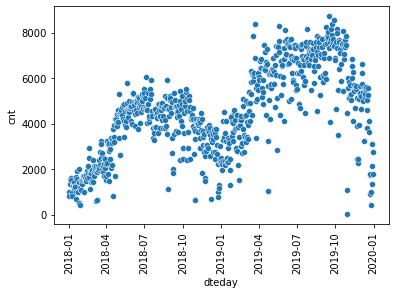

In [25]:
# we see a trend between dteday and temp, we also see since atemp and temp show exactly the same realtion we can drop one of them
sns.scatterplot(x=num_cols[0],y='cnt',data=Bk_df)
plt.xticks(rotation=90)
plt.show()

# As expected we see that there is a sharp dip in winter 

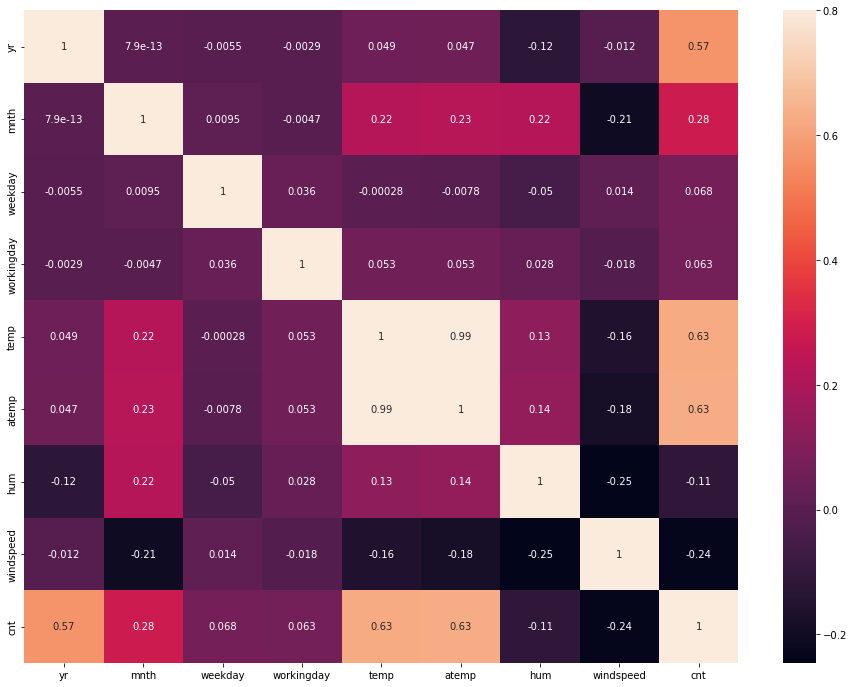

In [26]:
plt.figure(figsize=(16,12))
sns.heatmap(Bk_df.corr(),vmax=0.8,annot=True)
plt.show()

### Key obeservations for building a model.
* season has a high influance on the data
* temp also shows some anount of relation 
* weather shows significant effect on sales 
* working/ week days has a significant effect on the data 


In [27]:
#Lets take a copy of the data for model builing 
df_mod= Bk_df


In [28]:
# list of colums found to be redundant, or unuable for model building
drp_col=['atemp','dteday']
df_mod=df_mod.drop(drp_col,axis=1)
df_mod.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,1,6,0,Mist,14.1,80.6,10.7,985
1,Spring,2018,1,0,0,Mist,14.9,69.6,16.7,801
2,Spring,2018,1,1,1,Clear,8.1,43.7,16.6,1349
3,Spring,2018,1,2,1,Clear,8.2,59.0,10.7,1562
4,Spring,2018,1,3,1,Clear,9.3,43.7,12.5,1600


In [29]:
#name the months in mnth column
df_mod.mnth=df_mod.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_mod.mnth

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [30]:
#name the days of the weeks 
df_mod.weekday=df_mod.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df_mod.weekday

0      Sat
1      Sun
2      Mon
3      Tue
4      Wed
      ... 
725    Thu
726    Fri
727    Sat
728    Sun
729    Mon
Name: weekday, Length: 730, dtype: object

In [31]:
# importing data for model buliding 
import sklearn as skl
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [32]:
# Getting all dummies 
month_dum= pd.get_dummies(df_mod.mnth,drop_first=True)
day_dum=pd.get_dummies(df_mod.weekday,drop_first=True)
weath_dum=pd.get_dummies(df_mod.weathersit,drop_first=True)
seas_dum=pd.get_dummies(df_mod.season)


In [33]:
# The year holds only 2 values and can be reverted to its original config
df_mod.yr=df_mod.yr.map({2018:0,2019:1})

In [34]:
# Drop all the colums whos dummies are made 
df_mod=df_mod.drop(['mnth','weekday','weathersit','season'],axis=1)

In [35]:
#making the final data frame for building the model
final_df=pd.concat([df_mod,month_dum,day_dum,weath_dum,seas_dum],axis=1)
pd.set_option('display.max_columns',None)
final_df

,yr,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snow_rain,Mist,Fall,Spring,Summer,Winter
0,0,0,14.1,80.6,10.7,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,14.9,69.6,16.7,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,0,1,8.1,43.7,16.6,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.2,59.0,10.7,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,1,9.3,43.7,12.5,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,10.4,65.3,23.5,2114,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
726,1,1,10.4,59.0,10.4,3095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
727,1,0,10.4,75.3,8.3,1341,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
728,1,0,10.5,48.3,23.5,1796,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [36]:
# final model data has 29 columns
# We need to split the data into Tarin and Test set to validate the model that is made .
df_train , df_test= train_test_split(final_df,train_size=0.7 ,test_size=0.3,random_state=100)

In [37]:
# Apply scaler for the numeric data
scaler=MinMaxScaler()
num_var=['temp','hum','windspeed','cnt']
df_train[num_var]=scaler.fit_transform(df_train[num_var])
df_test[num_var]=scaler.transform(df_test[num_var])# since we must transform the test set the same as the train set .


In [38]:
# pop the target variable 
y_train=df_train.pop('cnt')
X_train=df_train
# perform the same on the test set
y_test=df_test.pop('cnt')
X_test=df_test


##### we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE 

In [39]:
# Recursive feature elimination
lm1= LinearRegression()
lm1.fit(X_train,y_train)
rfe= RFE(lm1,15) # Automated feature selection 
rfe= rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light_snow_rain', True, 1),
 ('Mist', True, 1),
 ('Fall', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [40]:
cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep', 'Sat',
       'Sun', 'Light_snow_rain', 'Mist', 'Fall', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [41]:
drop_cols=X_train.columns[~rfe.support_]# Columns that were de selected by RFE 
drop_cols=list(drop_cols)

## Building a modle using statsmodel so we get deatiled stats

In [42]:
#X_train made using the columns selected buy RFE
X_train_rfe=X_train[cols]
X_train_rfe=sm.add_constant(X_train_rfe)# add constant to data set

In [43]:
# Running the Linear model 1
lm1=sm.OLS(y_train,X_train_rfe).fit()

In [44]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 31 May 2022   Prob (F-statistic):          9.31e-192
Time:                        08:08:58   Log-Likelihood:                 518.06
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1404      0.028     

We can drop "Fall" as it has very high P value 

In [45]:
# Lets write a funtion to help us drop a column and makae the Linear Model
def buildlm(old_drop,new_drop,df,target=y_train):
    old_drop.append(new_drop)
    df=df.drop(old_drop,axis=1)
    lm=sm.OLS(target,df).fit()
    print(lm.summary())
    return old_drop,lm
drop_cols1=[]
drop_cols2 , lm2 = buildlm(drop_cols1,'Fall',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 31 May 2022   Prob (F-statistic):          9.31e-192
Time:                        08:08:58   Log-Likelihood:                 518.06
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1496      0.040     

Now we can drop "Sun"

In [46]:
drop_cols3 , lm3 = buildlm(drop_cols2,'Sun',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.6
Date:                Tue, 31 May 2022   Prob (F-statistic):          7.01e-192
Time:                        08:08:58   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1997      0.032     

Dropping 'Spring' as its P value is high

In [47]:
drop_cols4 , lm4 = buildlm(drop_cols3,'Spring',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     224.0
Date:                Tue, 31 May 2022   Prob (F-statistic):          1.22e-191
Time:                        08:08:58   Log-Likelihood:                 512.18
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     497   BIC:                            -943.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1431      0.024     

In [48]:
# Lets look at the VIF to pull out multicollinearity
def showVIF(df,cols):
    vif=pd.DataFrame()
    X=df.drop('const',axis=1)
    X=X.drop(cols,axis=1)
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending= False)
    display(vif)

showVIF(X_train_rfe,drop_cols4)

,Features,VIF
3,hum,13.40
2,temp,10.04
1,workingday,4.37
4,windspeed,3.55
9,Mist,2.30
0,yr,2.02
10,Summer,1.75
7,Sat,1.74
11,Winter,1.68
5,Jul,1.55


"Jul" Has a very hhigh P Value we can drop that and hope that the VIF of other columns drops

In [49]:
drop_cols5 , lm5 = buildlm(drop_cols4,'Jul',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     241.1
Date:                Tue, 31 May 2022   Prob (F-statistic):          1.86e-191
Time:                        08:08:58   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     498   BIC:                            -943.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1432      0.024     

All P Values are excellent now, Lets look at the VIF and Reduce multicollinearity

In [50]:
showVIF(X_train_rfe,drop_cols5)

,Features,VIF
3,hum,13.16
2,temp,7.78
1,workingday,4.36
4,windspeed,3.54
8,Mist,2.29
0,yr,2.02
6,Sat,1.74
10,Winter,1.63
9,Summer,1.58
7,Light_snow_rain,1.25


We can drop 'hum' as it has high VIF and the coef is fairly low

In [51]:
drop_cols6 , lm6 = buildlm(drop_cols5,'hum',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     254.4
Date:                Tue, 31 May 2022   Prob (F-statistic):          1.05e-188
Time:                        08:08:58   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     499   BIC:                            -930.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0748      0.019     

In [52]:
showVIF(X_train_rfe,drop_cols6)

,Features,VIF
2,temp,4.77
1,workingday,4.04
3,windspeed,3.45
0,yr,2.02
5,Sat,1.69
8,Summer,1.56
7,Mist,1.53
9,Winter,1.40
4,Sep,1.20
6,Light_snow_rain,1.08


The VIFs seem to be in contrl now.

In [53]:
drop_cols7 , lm7 = buildlm(drop_cols6,'Sep',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 31 May 2022   Prob (F-statistic):          5.68e-182
Time:                        08:08:58   Log-Likelihood:                 480.74
No. Observations:                 510   AIC:                            -941.5
Df Residuals:                     500   BIC:                            -899.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0743      0.019     

In [54]:
showVIF(X_train_rfe,drop_cols7)

,Features,VIF
2,temp,4.42
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
4,Sat,1.69
6,Mist,1.52
7,Summer,1.50
8,Winter,1.40
5,Light_snow_rain,1.08


lets drop "Sat" and see 


In [55]:
drop_cols8 , lm8 = buildlm(drop_cols7,'Sat',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.9
Date:                Tue, 31 May 2022   Prob (F-statistic):          9.11e-179
Time:                        08:08:58   Log-Likelihood:                 470.28
No. Observations:                 510   AIC:                            -922.6
Df Residuals:                     501   BIC:                            -884.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1055      0.018     

In [56]:
showVIF(X_train_rfe,drop_cols8)

,Features,VIF
2,temp,3.94
3,windspeed,3.15
1,workingday,2.81
0,yr,2.01
6,Summer,1.50
5,Mist,1.49
7,Winter,1.38
4,Light_snow_rain,1.08


In [57]:
# Dropping workingday as it has a very high P value
drop_cols9 , lm9 = buildlm(drop_cols8,'workingday',X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     313.0
Date:                Tue, 31 May 2022   Prob (F-statistic):          1.42e-178
Time:                        08:08:58   Log-Likelihood:                 466.86
No. Observations:                 510   AIC:                            -917.7
Df Residuals:                     502   BIC:                            -883.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1207      0.018     

Our model looks good

In [58]:
showVIF(X_train_rfe,drop_cols9)

,Features,VIF
1,temp,3.33
2,windspeed,3.02
0,yr,2.00
5,Summer,1.50
4,Mist,1.47
6,Winter,1.37
3,Light_snow_rain,1.08


#### As per stats we are satisfied with the model as all VIF & P values are low the R2 and Adjusted R2 are very close and high at 81% 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed 

In [59]:
# Considering our last model is the best 
fin_lm=lm9
X_train_fin=X_train_rfe.drop(drop_cols9,axis=1)
y_train_pred=fin_lm.predict(X_train_fin)

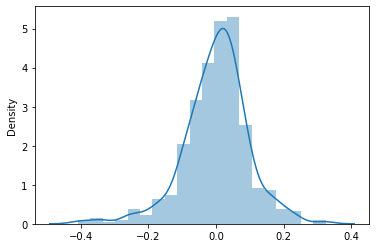

In [60]:
# Lets look at the error
sns.distplot((y_train-y_train_pred),bins=20)
plt.show()

The error is normaly distributed which is a good sign

### Testing the model on the test set 

In [61]:
# Before we start testing on the test set we need to drop all the columns we dropped while making the model
X_test.shape

(219, 28)

In [62]:
X_test=X_test.drop(drop_cols9,axis=1)# Dropping columns that were droped while builing the model
X_test=X_test.drop(drop_cols,axis=1)#Dropping columns that were dropped by RFE
X_test.shape

(219, 7)

In [63]:
X_test=sm.add_constant(X_test)

In [64]:
y_pred=fin_lm.predict(X_test)

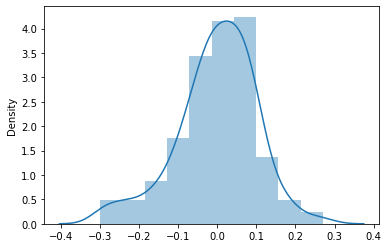

In [65]:
#lets look at the difference 
sns.distplot((y_test-y_pred), bins=10)
plt.show()

#### Errors are normallydistributed

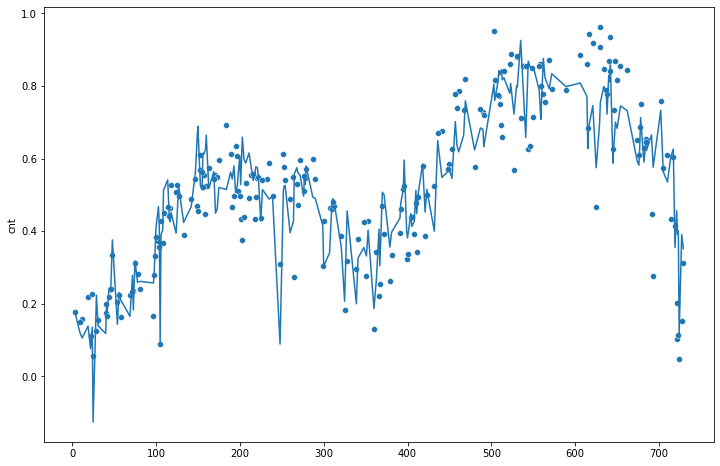

In [66]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=y_test)

sns.lineplot(data=y_pred)

plt.show()

The Model is very accurate and there are only a few points that fall out of the line. 

#### Looking at R2 score

In [67]:
round(r2_score(y_test,y_pred),4)*100

78.13

#### We are getting an 78% accuracy on the test set .. which is similar to the training set . Hence we can say that the model is stable and usable

In [68]:
d1=fin_lm.summary2()
t1=d1.tables[1]['Coef.']
t1=round(t1,3)
t1

const              0.121
yr                 0.232
temp               0.579
windspeed         -0.166
Light_snow_rain   -0.271
Mist              -0.074
Summer             0.076
Winter             0.126
Name: Coef., dtype: float64

## Prediction= 0.121 + 0.232 * yr +0.579*temp+0.076*Summer+0.126*Winter -(0.166*windspeed+0.271*Light_snow_rain+0.074*Mist)

### As Observed in The EDA we have a strong Positive correlation between the temprature and rentals
### we also have a strong negetive correlation between light snow/rain and the rentals .